In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qnmfits

sim = qnmfits.SXS(ID=305, zero_time=(2,2))

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


In [2]:
spherical_modes = [(2,2), (2,1), (2,0), (3,3), (3,2), (3,1), (3,0)]

modes, amplitudes, model = qnmfits.greedy_fit(
    sim.times, 
    sim.h, 
    Ftarget=0.001, 
    Nmax=10, 
    Mf=sim.Mf, 
    chif=sim.chif_mag, 
    t0=30, 
    spherical_modes=spherical_modes
)

print(modes)

[(2, 2, 0, 1), (3, 3, 0, 1), (2, 1, 0, 1), (3, 2, 0, 1)]


In [3]:
modes = [(l,2,n,1) for l in range(2,3+1) for n in range(7+1)]

# We must specify the spherical modes we want to include in the fit
spherical_modes = [(2,2),(3,2)]

best_fit = qnmfits.multimode_ringdown_fit(
    sim.times,
    sim.h,
    modes,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=0,
    spherical_modes=spherical_modes
)

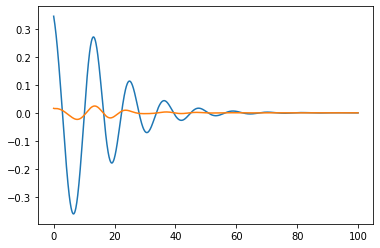

In [4]:
fig, ax = plt.subplots()

ax.plot(best_fit['model_times'], np.real(best_fit['model'][2,2]))
ax.plot(best_fit['model_times'], np.real(best_fit['model'][3,2]))

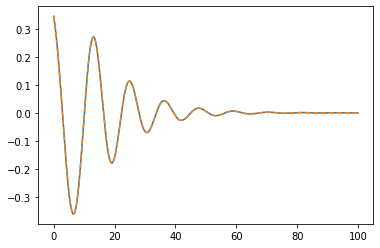

In [5]:
reconstructed_model = qnmfits.ringdown(best_fit['model_times'], 0, best_fit['weighted_C'][2,2], best_fit['frequencies'])

fig, ax = plt.subplots()

ax.plot(best_fit['model_times'], np.real(best_fit['model'][2,2]))
ax.plot(best_fit['model_times'], np.real(reconstructed_model), '--')

In [6]:
from scipy.interpolate import InterpolatedUnivariateSpline as spline

In [7]:
reconstructed_model_derivative = \
    qnmfits.ringdown_derivative(best_fit['model_times'], 0, best_fit['weighted_C'][2,2], best_fit['frequencies'])

In [8]:
model_derivative = {}

for lm in spherical_modes:

    data = best_fit['model'][lm]

    model_derivative[lm] = spline(best_fit['model_times'], data.real).derivative()(best_fit['model_times']) \
        + 1j*spline(best_fit['model_times'], data.imag).derivative()(best_fit['model_times'])

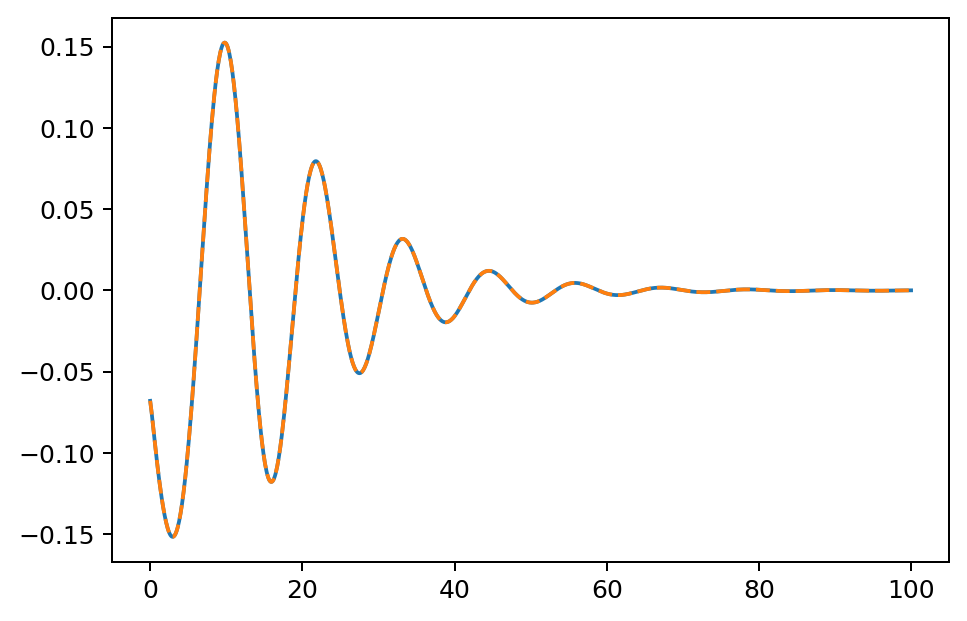

In [10]:
fig, ax = plt.subplots(dpi=180)

ax.plot(best_fit['model_times'], np.real(reconstructed_model_derivative))
ax.plot(best_fit['model_times'], np.real(model_derivative[2,2]), '--')